### Time Series - US Aviation - Prediction

### Overview

Purpose: To predict the growtth of US air passenger numbers using historical data from 1949 to 1961

###  Time Series Analysis
Description: Analysis of data over time where values are not overwritten and instead added to data to perform analysis of future state. Time Series data could be any point in time data ranging from millisecond to yearly data. e.g. weather data that is recorded daily with high/low/average or arrival and departure of aircrafts at a particular airport.


Why is time series analysis neccessary here? Because we want to predict the growth in numbers of passengers over time. We will use time as a base here and see the behaviour over this variable

### Load LIbraries

In [1]:
# Pandas for basic dataframe manipulation
import pandas as pd
# Numpy for numeric operations
import numpy as np
# matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline

### Load Data

In [2]:
pas = pd.read_csv('air-passengers.csv')

### Explore and Transform

In [3]:
pas.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

We can see the data is stored in a monthly format with number of passengers per month

In [4]:
pas.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
pas.isnull().values.any()

False

In [6]:
pas.describe()

#Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000

144 data points with a min  of 104 and max of 622 - a large range

In [7]:
# Transform from dataframe to series
from datetime import datetime

In [8]:
pas.Month = pd.to_datetime(pas.Month)

In [9]:
pas.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
pas.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [11]:
# Set index Month
pas.set_index('Month', inplace = True)

In [12]:
# Create variable ts that is equal to '#Passengers' column
ts = pas['#Passengers']

In [13]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
type(ts)

pandas.core.series.Series

In [15]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

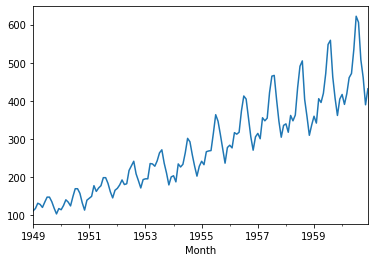

In [16]:
ts.plot()

Some seasonal patterns perhaps

### Decomposition

Decomposition is splitting data into its components which can be either systematic (i.e. explained / modelled due to consistency or recurrence) or unsystematic (i.e. random or those that cannot be explained using a model)

There are 3 components we generally look at when decomposing data:
1) Trend
2) Seasonality
3) Noise

The first two are systematic components.

**Trend**  is the increasing or decreasing value in the series

**Seasonality** is the repeating short-term cycle

**Noise** is the random variation in the series


**Additive models** are those where changes over time can be explained consistently by the same amount. Here we add on the 
trend, seasonality and noise

**Multiplicative models** are those where changes increase or decrease with time and you multiply the 3 components above

Our analysis will involve multiplicative models as the increases are not consistent and therefore not linear

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomposition = seasonal_decompose(ts)

In [19]:
trend = decomposition.trend

In [20]:
seasonal = decomposition.seasonal

In [21]:
residual = decomposition.resid

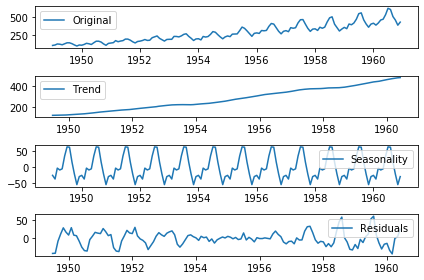

In [22]:
plt.subplot(411)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Model and transform

Testing for stationarity

This is required so that time series models can be contructed. If a time series is non-stationary then its distribution changes from time period to time period. With only one observation for each time period, it is difficult to see how one could make any inferences about the time series. It is like trying to hit a moving target knowing where it has been but with no knowledge of the direction it is moving in.

Generally - stationarity is the repeatablilty of the data where you can see the distribution is generally similar. Explicitly, there are three basic criterion for a series to be classified as stationary series:

1. The mean of the series should not be a function of time rather should be a constant. 


2. The variance of the series should not a be a function of time. This property is known as homoscedasticity. 


3. The covariance of the i th term and the (i + m) th term should not be a function of time. 


*KPSS* test can figure out whether a time series is stationary around a mean or linear trend or is non-stationary. It will help figure out if the mean and variance are constant over time. The *null hypothesis* is that the data is stationary. The *alternate hypothesis* is that the data is non-stationary. 

In [23]:
from statsmodels.tsa.stattools import kpss

In [24]:
# Run kpss test on our data
kpss(ts)

c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.0521750110135095,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### Interpret the results
Test statistic = 1.052175

p_value = 0.01

lags = 14

critical values at 10% = 0.347, 5% = 0.463, 2.5% = 0.574, 1% = 0.739



We should reject the null hypothesis as the value of the test statistic is > the critical values

Further the p_value is 0.01 which is very small

*Conclusion:* Reject null hypothesis i.e. data is not stationairy

#### Making data stationary

Lets make the data stationary as currently (we know from the graph) that the values are increasingly wider in range and the fluctuations are larger.

We can use logs to take the exponential growth out

In [25]:
ts_log = np.log(ts)

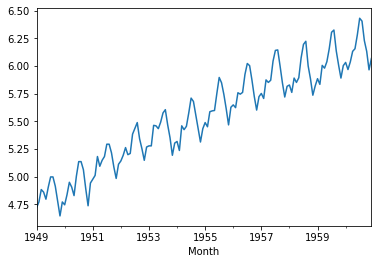

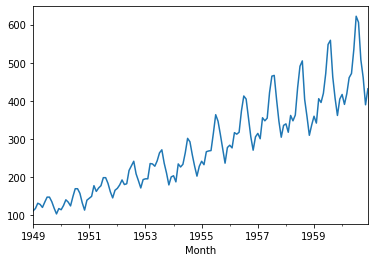

In [26]:
# Plot the graphs
ts_log.plot()
plt.show()
ts.plot()
plt.show()

We can see that the variance in the new plot (top one) is constant and there is a consistent pattern of growth rather than values increasing at an increasing rate.

#### Run another KPSS test but transform data using ts_log.diff().dropna()


In [27]:
ts_log.diff().dropna()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
1949-12-01    0.126294
1950-01-01   -0.025752
1950-02-01    0.091350
1950-03-01    0.112478
1950-04-01   -0.043485
1950-05-01   -0.076961
1950-06-01    0.175633
1950-07-01    0.131852
1950-08-01    0.000000
1950-09-01   -0.073203
1950-10-01   -0.172246
1950-11-01   -0.154151
1950-12-01    0.205444
1951-01-01    0.035091
1951-02-01    0.033902
1951-03-01    0.171148
1951-04-01   -0.088033
1951-05-01    0.053744
1951-06-01    0.034289
1951-07-01    0.111521
                ...   
1958-07-01    0.121098
1958-08-01    0.028114
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-

In [1]:
kpss(ts1_log.diff().dropna())

NameError: name 'kpss' is not defined

#### Conclusion on stationarity: p_value is 0.1 which is large enough (greater than 0.05) to accept our null hypothesis and test statistic is now lower than the critical values. Therefore we conclude the data is stationary.

### ARIMA model

ARIMA modelling: ARIMA stands for Autoregressive Integrated Moving Average models. Univariate (single vector) ARIMA is a forecasting technique that projects the future values of a series based entirely on its own inertia. Its main application is in the area of short term forecasting requiring at least 40 historical data points. It works best when your data exhibits a stable or consistent pattern over time with a minimum amount of outliers.

In [29]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

In [30]:
# Import arima_model
from statsmodels.tsa.arima_model import ARIMA

#### Method 1 - MSE of a single ARIMA model

In [31]:
# This method finds the MSE of a single ARIMA model.
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) # Needs to be an integer because it is later used as an index.
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model.
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

#### Method 2 - ARIMA model evaluation with several different p,d and q values

In [32]:
# This method evaluates ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:

In [33]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [34]:
evaluate_models(ts, p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=11363.155
ARIMA(0, 1, 1) MSE=2481.165
ARIMA(0, 1, 2) MSE=2715.697
ARIMA(0, 2, 1) MSE=2890.540
ARIMA(0, 2, 2) MSE=2550.209
ARIMA(1, 0, 0) MSE=2758.976
ARIMA(1, 0, 1) MSE=2452.351
ARIMA(1, 0, 2) MSE=2666.382
ARIMA(1, 1, 0) MSE=2525.942
ARIMA(1, 1, 1) MSE=2570.447
ARIMA(1, 2, 0) MSE=3762.605
ARIMA(2, 0, 0) MSE=2460.080


c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1) MSE=2490.262


c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian fa

c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0) MSE=2458.063
ARIMA(2, 1, 1) MSE=1727.565
ARIMA(2, 1, 2) MSE=1755.017
ARIMA(2, 2, 0) MSE=3757.904


c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 2, 2) MSE=2591.334
Best ARIMA(2, 1, 1) MSE=1727.565


In [35]:
# Fit an ARIMA model using the p, d, q recommendations you've found using:

p=2
d=1
q=1
model = ARIMA(ts, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\hirania\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.882
Date:                Tue, 13 Aug 2019   AIC                           1361.696
Time:                        13:49:06   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passengers    -0.5104      0.072     -7.095      0.000      -0.651      -0.369
ma.L1.D.#Passengers    -0.9999      0.029    -34.129      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0818           -0.8883j            1.3998           -0.1094
AR.2            1.0818           +0.8883j            1.3998            0.1094
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

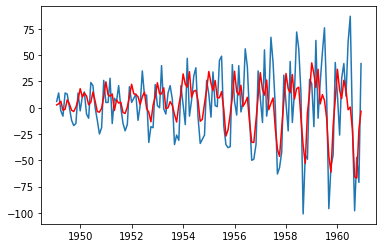

In [37]:
# Plot the fitted model against the original data using the following code (try explaining what it does):

plt.plot(ts.diff())
plt.plot(model_fit.predict(), color = 'red')

The above is trying to predict the model's estimate of the passenger volumes (in red). 

### Forecasting

In [38]:
# Now we can use our model above to create a forecast post 1960s
periods_to_forecast = 24


In [39]:
# Create a range of future dates that is the length of
# the periods you've chosen to forecast
date_range = pd.date_range(ts.index[-1], periods = periods_to_forecast,
              freq='MS').strftime("%Y-%m-%d").tolist()

# Turn that range into a dataframe that includes your predictions
future_months = pd.DataFrame(date_range, columns = ['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)

In [40]:
future_months['Prediction'] = forecast[0]

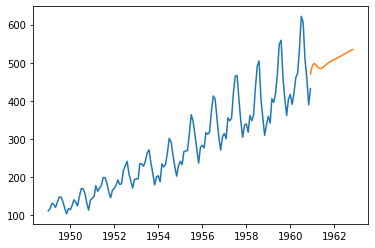

In [41]:
plt.plot(ts)
plt.plot(future_months)
plt.show()

In [42]:
future_months

Prediction
Month                 
1960-12-01  470.455542
1961-01-01  492.568971
1961-02-01  498.445412
1961-03-01  494.732532
1961-04-01  488.717453
1961-05-01  485.054274
1961-06-01  485.163193
1961-07-01  488.237151
1961-08-01  492.660112
1961-09-01  497.059450
1961-10-01  500.744207
1961-11-01  503.651934
1961-12-01  506.066321
1962-01-01  508.332505
1962-02-01  510.686822
1962-03-01  513.214100
1962-04-01  515.887392
1962-05-01  518.633646
1962-06-01  521.385949
1962-07-01  524.107692
1962-08-01  526.792603
1962-09-01  529.452439
1962-10-01  532.103382
1962-11-01  534.757304

### Evaluate and Communicate

#### Summary
We have created predictions using 1949-1961 US aviation figures for 1962, This shows an increase in the air passenger numbers.

We used the ARIMA model as it can be used for a small dataset. However, we have lost some of the value by differentiating to make the data stationary and can no longer see the fluctuation over the seasons.

Also we are only using the final output itself to predict the future rather than using other factors.

Further analysis should be done using regression so that other factors can be taken into account whne predicting these numbers.